In [7]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 12,8

In [15]:
dataset = pd.read_csv(r"E:\RU\euro_rate_in_India.csv")
dataset.dropna(inplace=True)
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
IndexedDataset = dataset.set_index(['Month'])

In [16]:
from datetime import datetime
IndexedDataset.head(5)

,Price_Monthly
Month,
2015-04-01,71.31
2015-05-01,70.04
2015-06-01,70.84
2015-07-01,70.31
2015-08-01,74.48


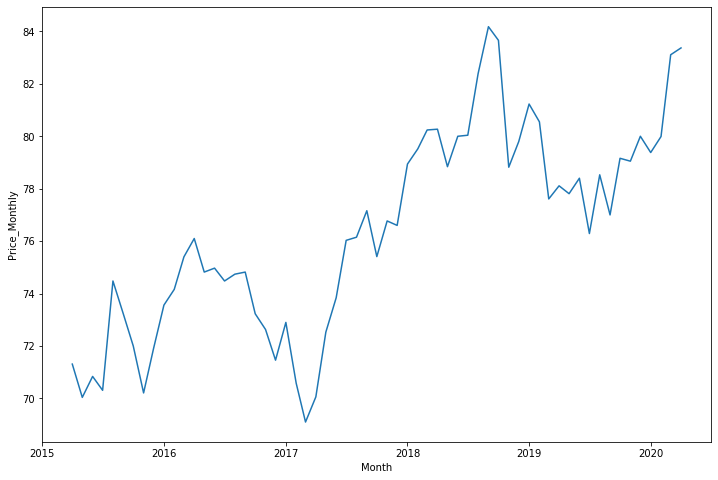

In [17]:
plt.xlabel("Month")
plt.ylabel("Price_Monthly")
plt.plot(IndexedDataset)

In [18]:
rolmean = IndexedDataset.rolling(window= 12).mean()
rolestd = IndexedDataset.rolling(window = 12).std()
print(rolmean,rolestd)

            Price_Monthly
Month                    
2015-04-01            NaN
2015-05-01            NaN
2015-06-01            NaN
2015-07-01            NaN
2015-08-01            NaN
...                   ...
2019-12-01      78.645000
2020-01-01      78.490833
2020-02-01      78.444167
2020-03-01      78.902500
2020-04-01      79.340833

[61 rows x 1 columns]             Price_Monthly
Month                    
2015-04-01            NaN
2015-05-01            NaN
2015-06-01            NaN
2015-07-01            NaN
2015-08-01            NaN
...                   ...
2019-12-01       1.444630
2020-01-01       1.225832
2020-02-01       1.148536
2020-03-01       1.733725
2020-04-01       2.133897

[61 rows x 1 columns]


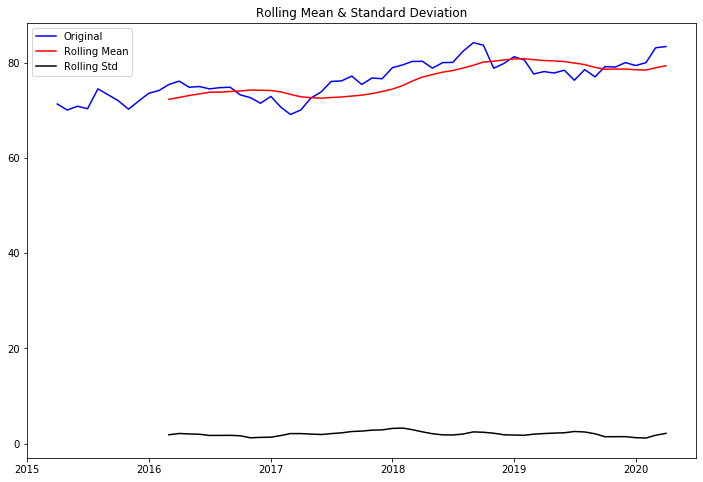

In [19]:
orig = plt.plot(IndexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color = 'red', label= 'Rolling Mean')
std = plt.plot(rolestd, color = 'black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [20]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Dickey-Fuller Test:')
dftest = adfuller(IndexedDataset['Price_Monthly'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lag Used','Number Of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Dickey-Fuller Test:
Test Statistic                -1.358690
p-value                        0.601913
#Lag Used                      0.000000
Number Of Observation Used    60.000000
Critical Value (1%)           -3.544369
Critical Value (5%)           -2.911073
Critical Value (10%)          -2.593190
dtype: float64


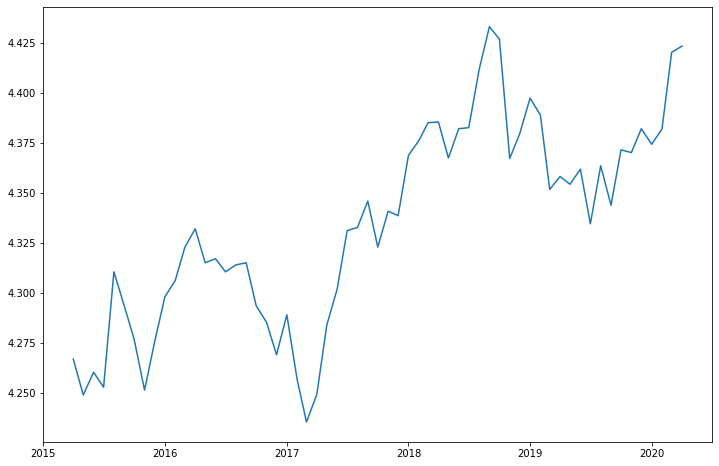

In [21]:
#Estimate trend
IndexedDataset_logScale = np.log(IndexedDataset)
plt.plot(IndexedDataset_logScale)

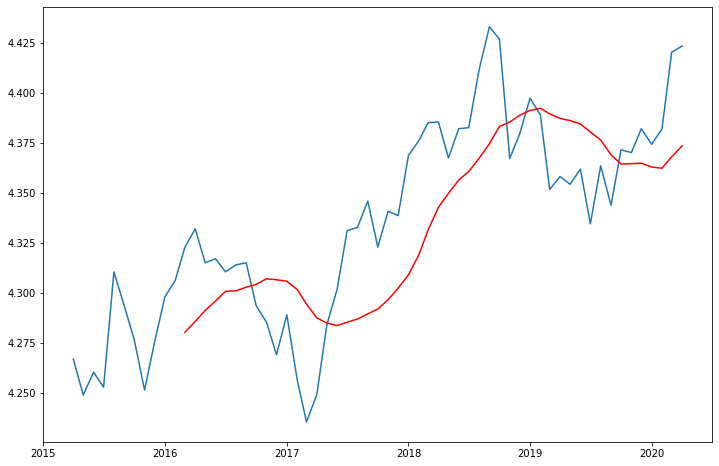

In [22]:
movingAverage = IndexedDataset_logScale.rolling(window = 12).mean()
movingSTD = IndexedDataset_logScale.rolling(window = 12).std()
plt.plot(IndexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [23]:
datasetLogScaleMinusMovingAverage = IndexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#remove NaN
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head(10)

,Price_Monthly
Month,
2016-03-01,0.042450
2016-04-01,0.046274
2016-05-01,0.023809
2016-06-01,0.021090
2016-07-01,0.009731
2016-08-01,0.012926
2016-09-01,0.012205
2016-10-01,-0.010686
2016-11-01,-0.021737


In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orgi = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Price_Monthly'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

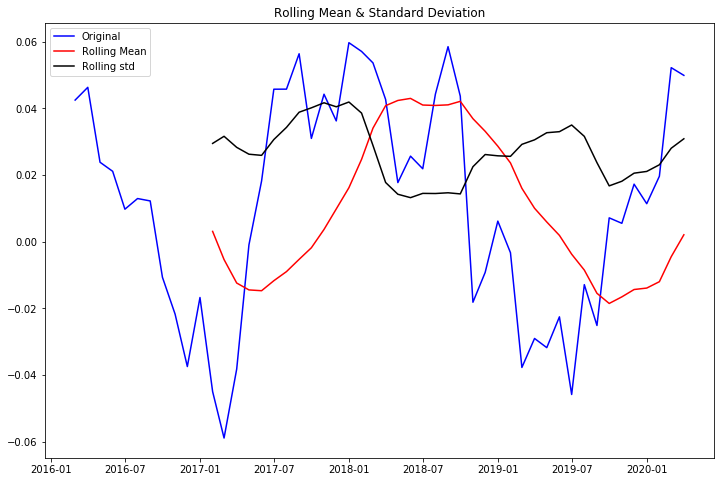

Results of Dickey-Fuller Test:
Test Statistic                 -2.105799
p-value                         0.242189
#Lags Used                      0.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [28]:
test_stationarity(datasetLogScaleMinusMovingAverage)

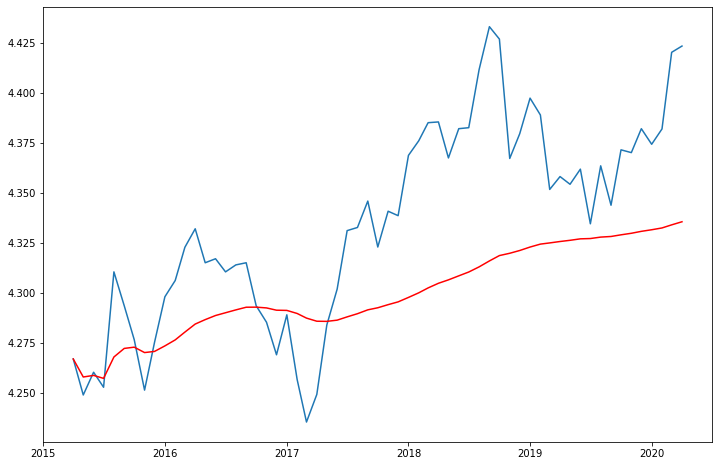

In [29]:
exponentialDecayWeightedAverage = IndexedDataset_logScale.ewm(halflife=365, min_periods=0, adjust=True).mean()
plt.plot(IndexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color ='red')

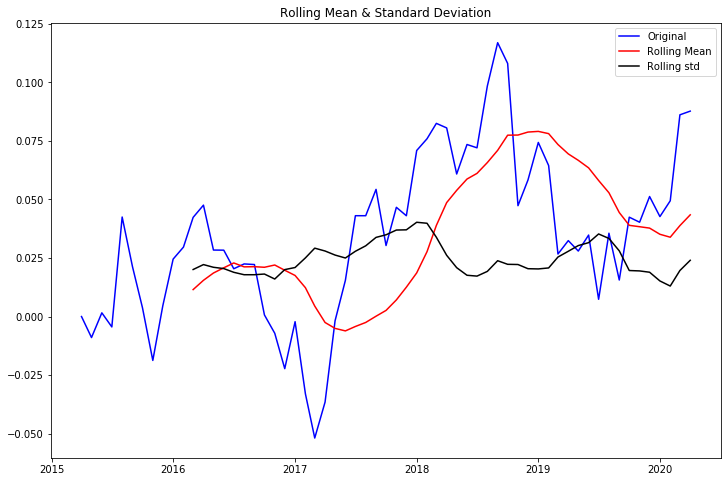

Results of Dickey-Fuller Test:
Test Statistic                 -2.072360
p-value                         0.255773
#Lags Used                      0.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [30]:
datasetLogScaleMinusMovingExponentialDecayAverage = IndexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

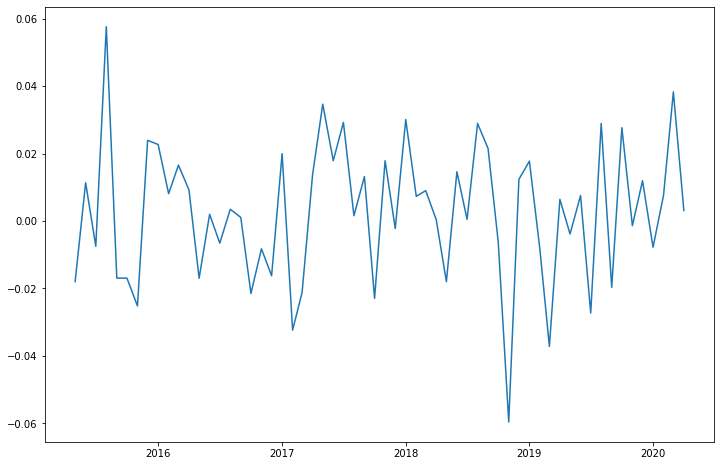

In [31]:
datasetLogDiffShifting = IndexedDataset_logScale - IndexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

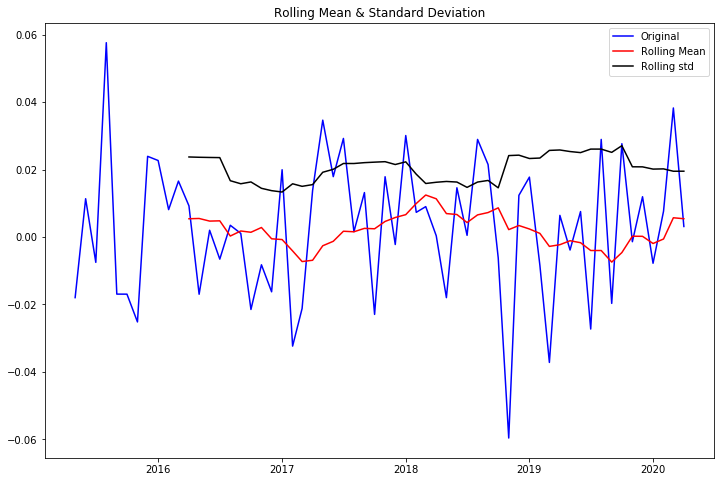

Results of Dickey-Fuller Test:
Test Statistic                -8.333259e+00
p-value                        3.324380e-13
#Lags Used                     0.000000e+00
Number of Observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64


In [32]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

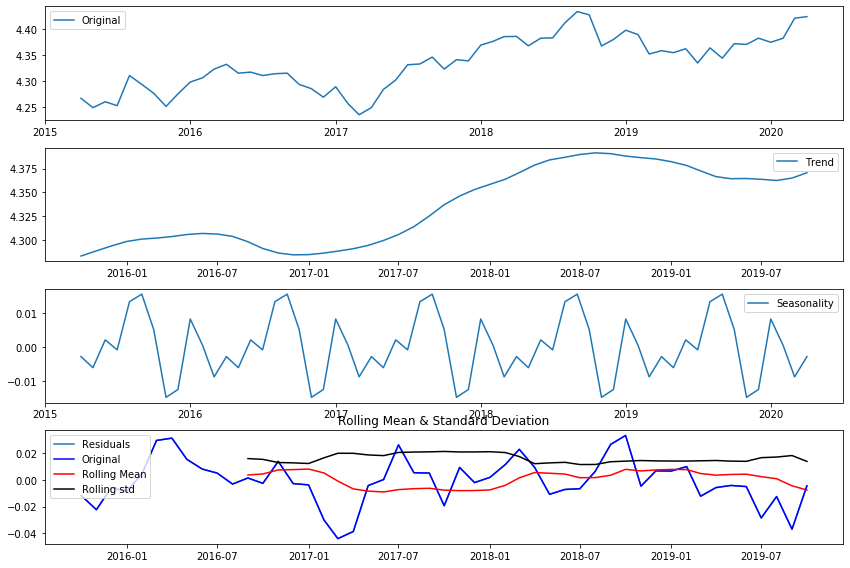

Results of Dickey-Fuller Test:
Test Statistic                 -4.231742
p-value                         0.000582
#Lags Used                      2.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(IndexedDataset_logScale,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(IndexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


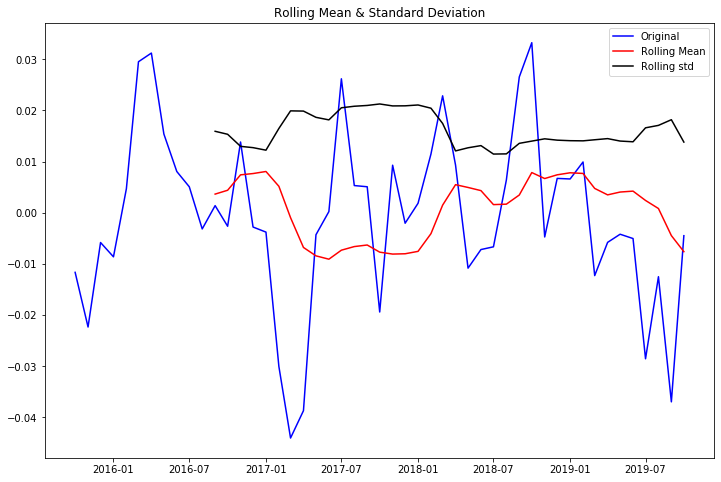

Results of Dickey-Fuller Test:
Test Statistic                 -4.231742
p-value                         0.000582
#Lags Used                      2.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [35]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


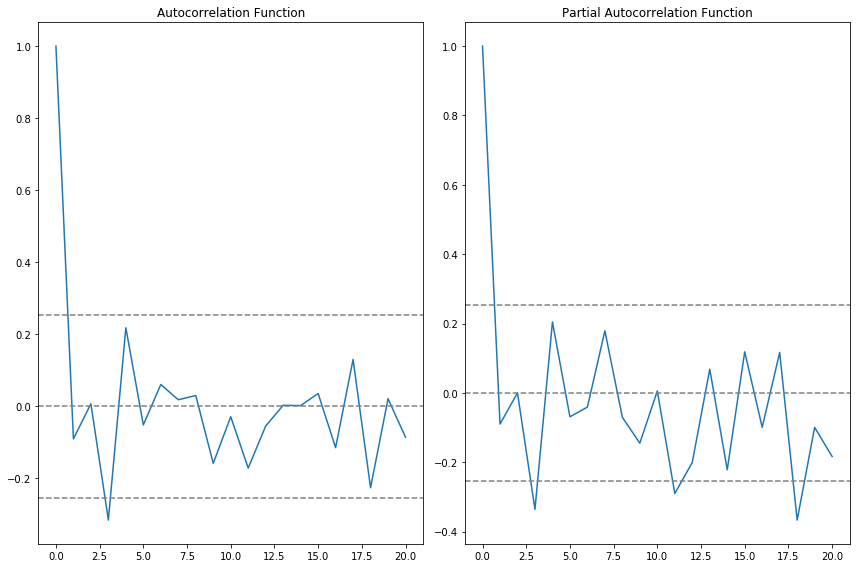

In [36]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method ='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle ='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


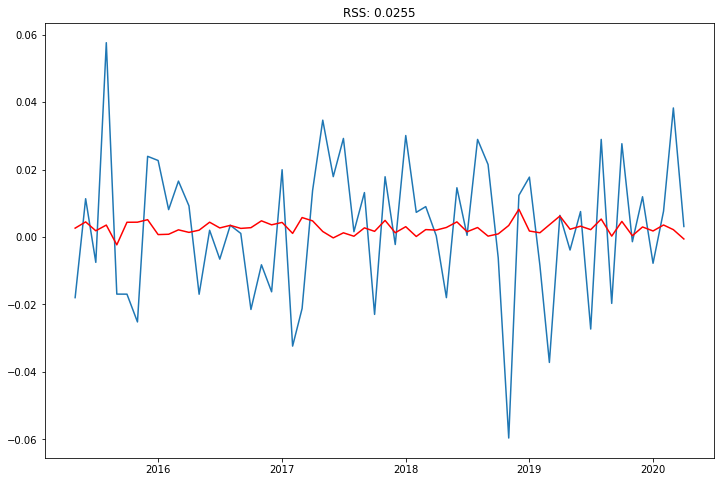

In [38]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(IndexedDataset_logScale,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Price_Monthly'])**2))
print('Plotting AR Model')

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


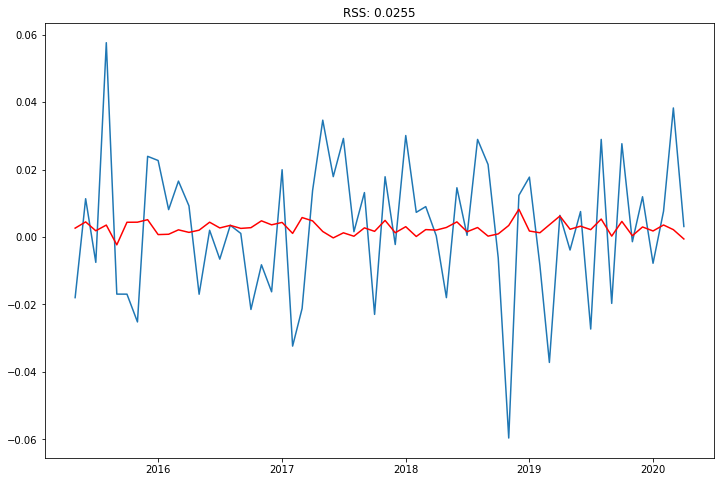

In [39]:
#MA Model
model = ARIMA(IndexedDataset_logScale,order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Price_Monthly'])**2))
print('Plotting MA Model')

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


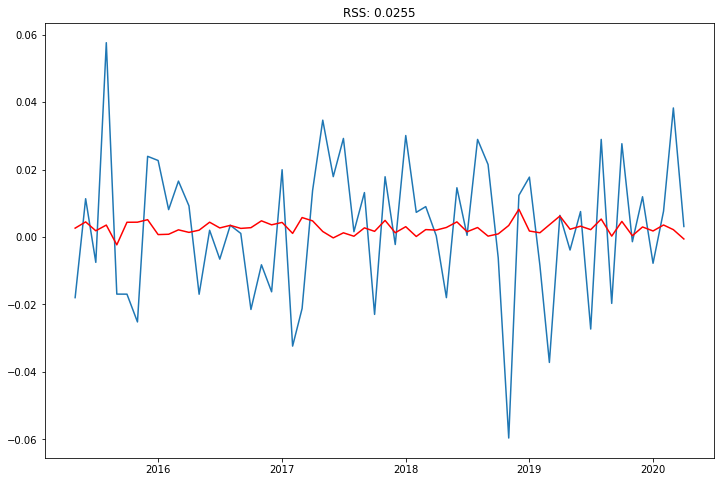

In [42]:
model = ARIMA(IndexedDataset_logScale,order=(2,1,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Price_Monthly'])**2))
print('Plotting ARIMA Model')

In [43]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
2015-05-01    0.002632
2015-06-01    0.004486
2015-07-01    0.001852
2015-08-01    0.003542
2015-09-01   -0.002315
dtype: float64


In [44]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())


Month
2015-05-01    0.002632
2015-06-01    0.007118
2015-07-01    0.008970
2015-08-01    0.012512
2015-09-01    0.010197
dtype: float64


In [46]:
predictions_ARIMA_log = pd.Series(IndexedDataset_logScale['Price_Monthly'].ix[0], index=IndexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2015-04-01    4.267037
2015-05-01    4.269668
2015-06-01    4.274154
2015-07-01    4.276007
2015-08-01    4.279549
dtype: float64

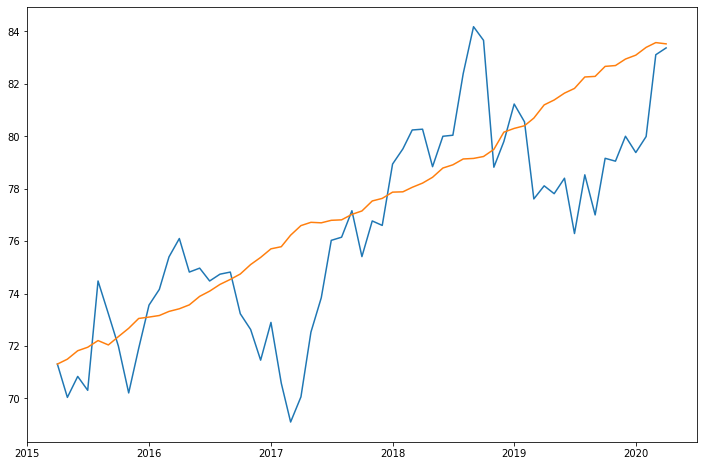

In [47]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(IndexedDataset)
plt.plot(predictions_ARIMA)

In [48]:
IndexedDataset_logScale

,Price_Monthly
Month,
2015-04-01,4.267037
2015-05-01,4.249067
2015-06-01,4.260424
2015-07-01,4.252914
2015-08-01,4.310531
...,...
2019-12-01,4.382027
2020-01-01,4.374246
2020-02-01,4.381902


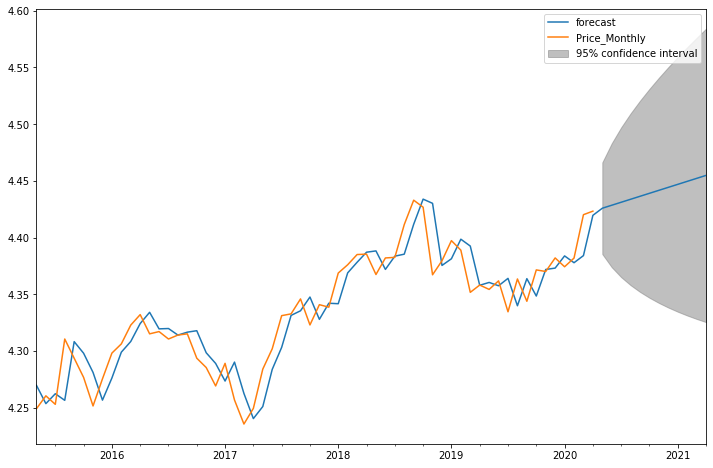

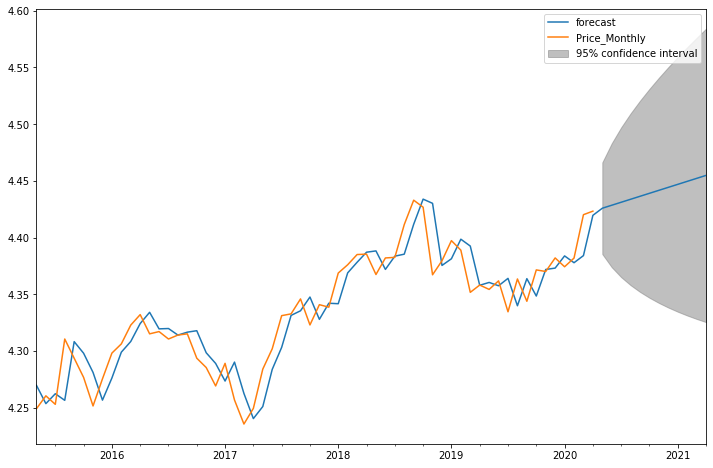

In [49]:
results_ARIMA.plot_predict(1,72)

In [51]:
results = results_ARIMA.forecast(steps=11)
converted_results = [(np.exp(x)) for x in [i for i in results]]
converted_results

[array([83.58511028, 83.80577767, 84.0265898 , 84.24802176, 84.47003394,
        84.69263146, 84.91581555, 85.13958778, 85.3639497 , 85.58890287,
        85.81444884]),
 array([1.02084134, 1.02828157, 1.03428192, 1.03940969, 1.04397379,
        1.04813163, 1.05197899, 1.05557905, 1.0589761 , 1.06220261,
        1.06528321]),
 array([[80.27329248, 87.03356303],
        [79.34777944, 88.51423972],
        [78.65475047, 89.76530663],
        [78.10129989, 90.87850241],
        [77.6375337 , 91.90382916],
        [77.2380574 , 92.86667822],
        [76.88746255, 93.78246454],
        [76.57561522, 94.66132771],
        [76.29543024, 95.51035869],
        [76.04172704, 96.33474382],
        [75.81058392, 97.1384106 ]])]